In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import plotly.express as px
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!ls -la

total 84568
drwxr-xr-x@ 13 avkash  staff       416 Mar 26 09:17 .
drwxr-xr-x  11 avkash  staff       352 Mar 26 08:41 ..
-rw-r--r--@  1 avkash  staff      6148 Mar 26 09:06 .DS_Store
drwxr-xr-x   5 avkash  staff       160 Mar 26 09:17 .ipynb_checkpoints
-rw-r--r--   1 avkash  staff       186 Mar 26 07:57 README.md
-rw-r--r--   1 avkash  staff        72 Mar 26 09:17 Untitled.ipynb
-rw-r--r--   1 avkash  staff        72 Mar 25 18:26 Untitled1.ipynb
-rw-r--r--   1 avkash  staff  14274126 Mar 26 08:54 ca_daily_fire_2000_2021-v2.csv
-rw-r--r--@  1 avkash  staff    643505 Mar 25 19:00 points.geojson
-rw-r--r--   1 avkash  staff      3392 Mar 26 09:11 show_wildfire_map.ipynb
-rw-r--r--   1 avkash  staff  26656065 Mar 26 08:32 usa_daily_fire_2012_2021.csv.gz
-rw-r--r--   1 avkash  staff    294617 Mar 26 00:42 wildfire_data.ipynb
-rw-r--r--   1 avkash  staff    318461 Mar 26 09:15 wildfire_data_creation.ipynb


In [6]:
source = "ca_daily_fire_2000_2021-v2.csv"

In [7]:
df = pd.read_csv(source)

In [8]:
df

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 1440x720 with 0 Axes>

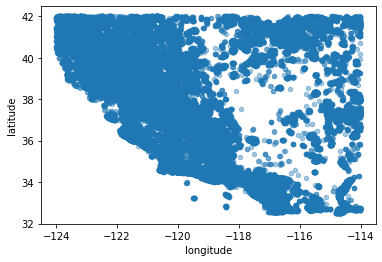

In [16]:
plt.figure(figsize=[20,10])
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

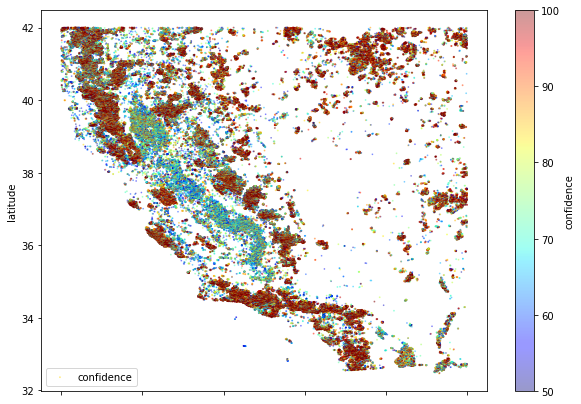

In [17]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['confidence']/100, label="confidence",
    c="confidence", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

Text(0, 0.5, 'Latitude')

Text(0.5, 0, 'Longitude')

/var/folders/j9/zkczhkln1w95vm9cj3p_qzhr0000gp/T/ipykernel_27225/1734779396.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["%d"%(round(v)) for v in tick_values], fontsize=14)


[Text(1, 0.0, '50'),
 Text(1, 0.2, '60'),
 Text(1, 0.4, '70'),
 Text(1, 0.6000000000000001, '80'),
 Text(1, 0.8, '90'),
 Text(1, 1.0, '100')]

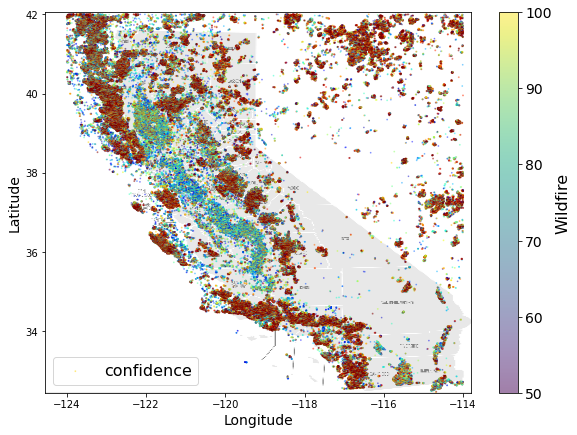

In [31]:
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df['confidence']/100, label="confidence",
                       c="confidence", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

confidence = df["confidence"]
tick_values = np.linspace(confidence.min(), confidence.max(), 6)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["%d"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Wildfire', fontsize=16)

plt.legend(fontsize=16)
plt.show()